# Netflix VS Disney +

## Limpieza de datos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo Disney Plus
file_path_disney = r'C:\Users\almuo\Desktop\IRONHACK\Project 1 Disney vs Netflix\disney_plus_titles.csv'

# Intentar leer el archivo CSV de Disney Plus usando diferentes codificaciones
try:
    df1 = pd.read_csv(file_path_disney, encoding='latin1')
    print("Disney Plus data imported successfully with encoding 'latin1'.")
except UnicodeDecodeError:
    try:
        df1 = pd.read_csv(file_path_disney, encoding='iso-8859-1')
        print("Disney Plus data imported successfully with encoding 'iso-8859-1'.")
    except UnicodeDecodeError:
        df1 = pd.read_csv(file_path_disney, encoding='cp1252')
        print("Disney Plus data imported successfully with encoding 'cp1252'.")

# Muestra las primeras filas del DataFrame para verificar que se ha importado correctamente
print("Disney Plus Data (df1):")
print(df1.head())





Disney Plus data imported successfully with encoding 'latin1'.
Disney Plus Data (df1):
  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, 

In [7]:
# Ruta del archivo Netflix
file_path_netflix = r"C:\Users\almuo\Desktop\IRONHACK\Project 1 Disney vs Netflix\netflix_titles.csv"

# Intentar leer el archivo CSV de Netflix usando diferentes codificaciones
try:
    df2 = pd.read_csv(file_path_netflix, encoding='latin1')
    print("Netflix data imported successfully with encoding 'latin1'.")
except UnicodeDecodeError:
    try:
        df2 = pd.read_csv(file_path_netflix, encoding='iso-8859-1')
        print("Netflix data imported successfully with encoding 'iso-8859-1'.")
    except UnicodeDecodeError:
        df2 = pd.read_csv(file_path_netflix, encoding='cp1252')
        print("Netflix data imported successfully with encoding 'cp1252'.")

# Muestra las primeras filas del DataFrame para verificar que se ha importado correctamente
print("Netflix Data (df2):")
print(df2.head())

Netflix data imported successfully with encoding 'latin1'.
Netflix Data (df2):
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     

In [8]:
# Visualizar las columnas de disney
print(df1.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [9]:
# visualizar las columnas de netflix
print(df2.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [10]:
# Eliminamos las columnas 'Unnamed: 12'
df2 = df2.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'])


In [11]:
# Agregamos una columna nueva a df1 que se llame plataforma para saber en que plataforma se encuentra la serie
df1['plataforma'] = 'disney'
df2['plataforma'] = 'netflix'

In [12]:
# Unimos las dos bases de datos
df = pd.concat([df1, df2], ignore_index=True)

In [13]:
# Valores duplicados
df.duplicated().sum()

0

In [14]:
# Nombres duplicados
df.duplicated(subset=['title']).sum()

46

In [15]:
# visualizamos tipos de datos en df
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
plataforma      object
dtype: object

In [16]:
# Eliminamos columna country
df = df.drop(columns=['country'])

In [17]:
# Eliminamos la columna description
df = df.drop(columns=['description'])

In [18]:
# Eliminamos las filas que tengan mas del 50% de valores vacios
df = df.dropna(thresh=len(df)*0.5, axis=1)

In [19]:
# visualizamos el numero de celdas por columna
df.count()

show_id         10259
type            10259
title           10259
director         7152
cast             9244
date_added      10246
release_year    10259
rating          10252
duration        10256
listed_in       10259
plataforma      10259
dtype: int64

In [21]:
# Creo que aquí me falta una línea de código
df['director'] = df['director'].fillna('Desconocido')
df['cast'] = df['cast'].fillna('No Disponible')
# Quitamos los valores nulos en rating para evitar errores
df['rating'] = df['rating'].fillna('Desconocido')
#Eliminamos las fechas con espacios adicionales (en el error aparecía " August 4, 2017")
df['date_added'] = df['date_added'].str.strip()
# Convertimos la columna 'date_added' a formato de fecha, sin especificar el formato de origen(puede haber varios)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [33]:
# Eliminamos de la columna rating las calificaciones '74 min', '84 min', '66 min' y A
df = df[~df['rating'].isin(['74 min', '84 min', '66 min', 'A'])]

In [46]:
# Eliminamos las FILAS que tengan NC-17 y UR
df = df[~df['rating'].isin(['NC-17', 'UR'])]

In [47]:
# Visualizar valores de calificacion
df['rating'].value_counts()

rating
TV-MA       3208
TV-14       2239
TV-PG       1164
R            799
PG-13        556
TV-G         538
PG           523
TV-Y7        465
TV-Y         357
G            294
NR            80
TV-Y7-FV      19
Name: count, dtype: int64

In [48]:
# Visualizar los datos de 'R', 'TV-MA', 'NC-17' de plataforma 'disney'
df[(df['plataforma'] == 'disney') & (df['rating'].isin(['R', 'TV-MA', 'NC-17']))]

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,plataforma,age_category


In [24]:
def categorize_rating(rating):
    if rating in ['TV-Y', 'TV-G', 'G']:
        return 'Para todas las edades / niños pequeños'
    elif rating in ['TV-Y7', 'TV-Y7-FV', 'PG', 'TV-PG']:
        return 'Para niños mayores'
    elif rating in ['PG-13', 'TV-14']:
        return 'Para adolescentes'
    elif rating in ['R', 'TV-MA', 'NC-17']:
        return 'Para adultos'
    else:
        return 'Desconocido'
    

df['age_category'] = df['rating'].apply(categorize_rating)

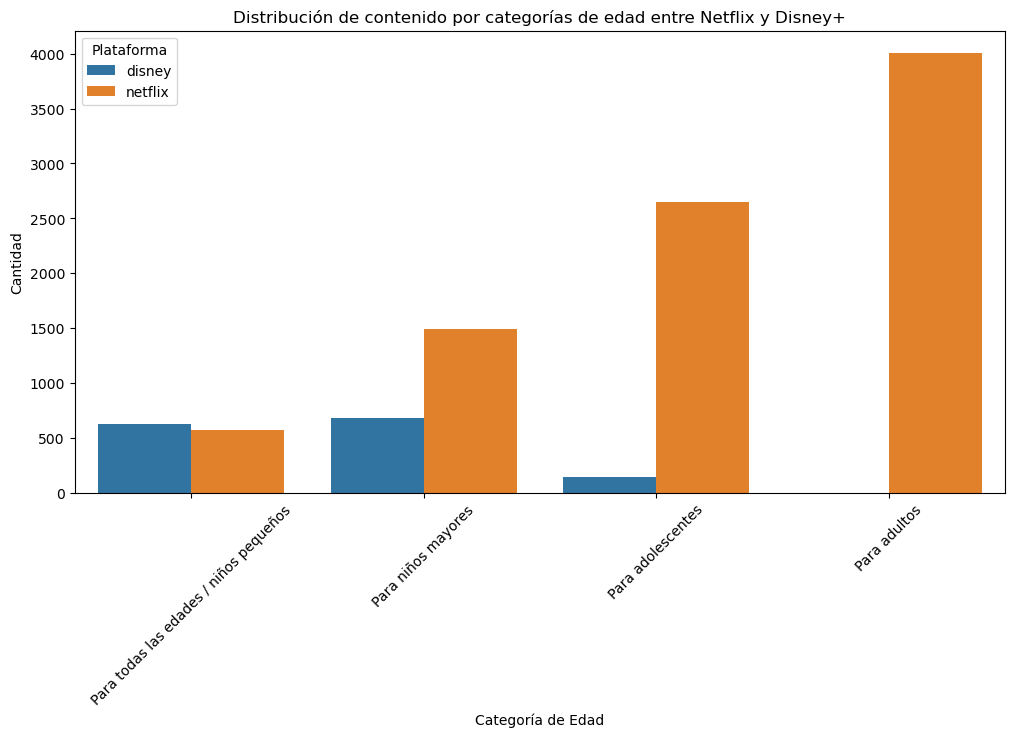

In [26]:
# Excluimos desconocido sin eliminar esos contenidos del dataframe
df_filtered = df[df['age_category'] != 'Desconocido']

# Crear el gráfico con los datos filtrados
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='age_category', hue='plataforma')
plt.title('Distribución de contenido por categorías de edad entre Netflix y Disney+')
plt.xlabel('Categoría de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.show()

## EDA

In [26]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast         date_added  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  November 26, 2021   
1           Jim Varney, Noelle Parker, Douglas Seale  November 26, 2021   
2  Raymond Albert Romano, John Leguizamo, Denis L...  November 26, 2021   
3  Darren Criss, Adam Lamb

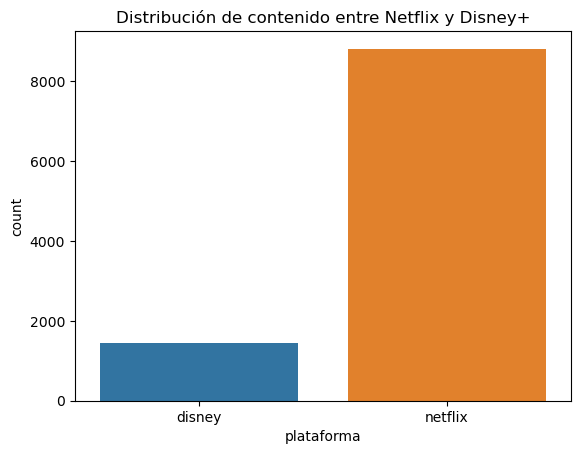

In [29]:
# Distribución de contenido entre Netflix y Disney+
sns.countplot(data=df, x='plataforma')
plt.title('Distribución de contenido entre Netflix y Disney+')
plt.show()

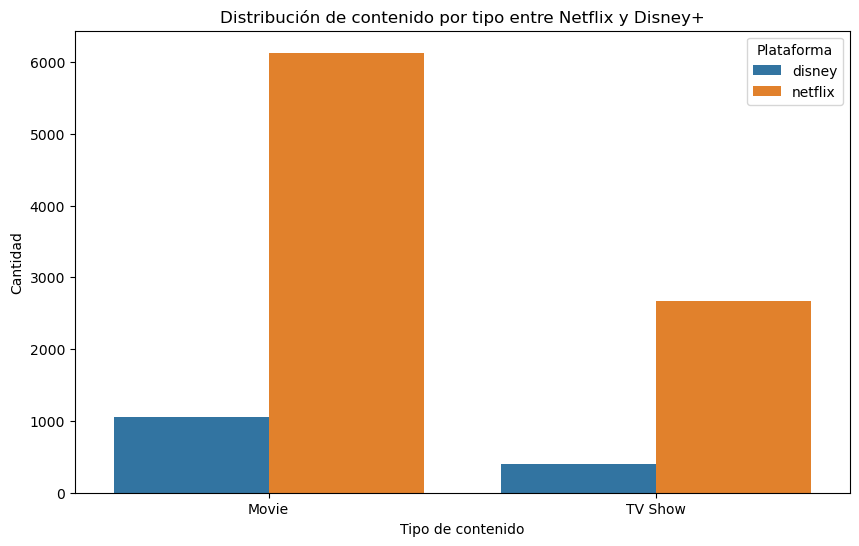

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='plataforma')
plt.title('Distribución de contenido por tipo entre Netflix y Disney+')
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.legend(title='Plataforma')
plt.show()

In [37]:
# Obtener el año actual
current_year = 2023

# Filtrar los datos para incluir solo los años desde 1998 hasta el actual
df_last_25_years = df[df['release_year'] >= (current_year - 25)]

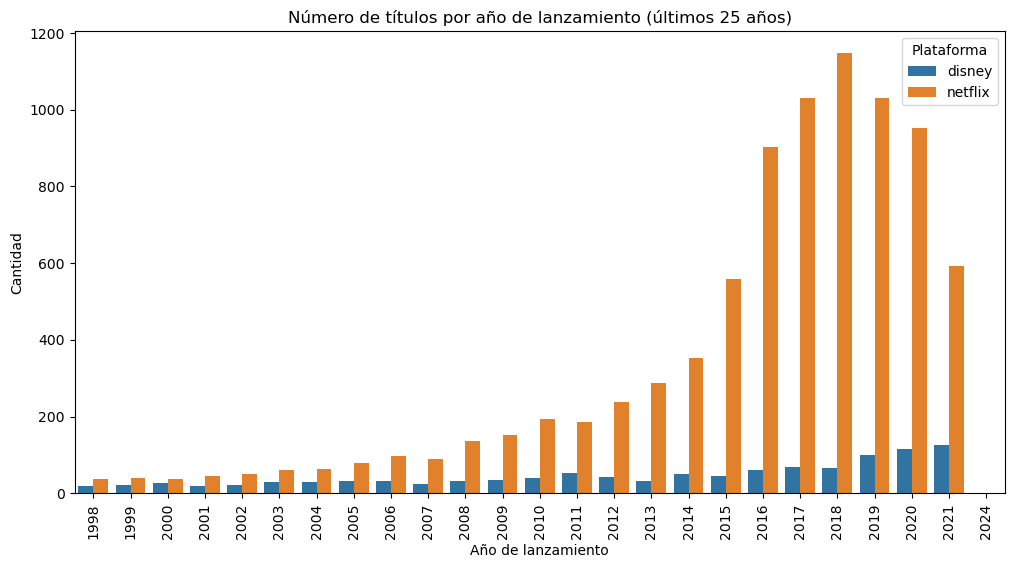

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_last_25_years, x='release_year', hue='plataforma')
plt.title('Número de títulos por año de lanzamiento (últimos 25 años)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Plataforma')
plt.show()

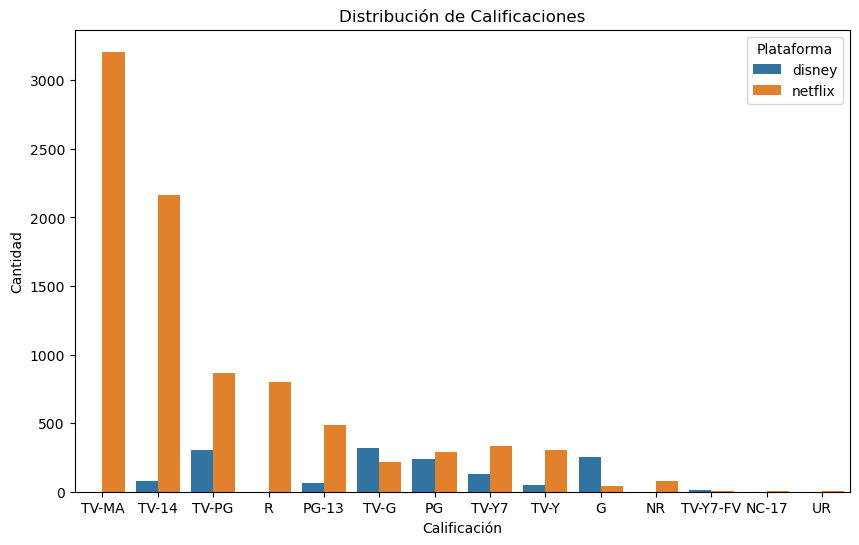

In [34]:
# Distribución de Calificaciones
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='plataforma', order=df['rating'].value_counts().index)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.legend(title='Plataforma')
plt.show()

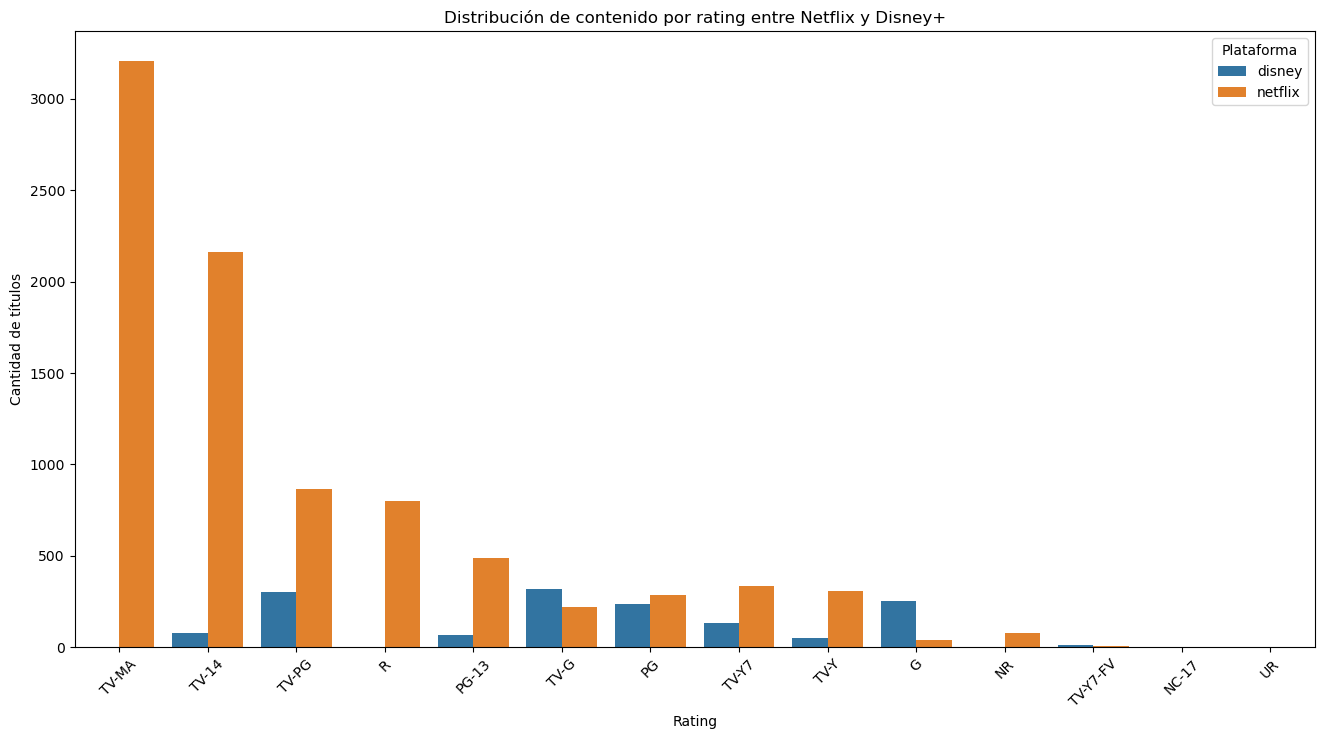

In [41]:
# Configuración del tamaño de la figura
plt.figure(figsize=(16, 8))

# Lista de ratings en un orden específico
ratings_order = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-G', 'PG', 'TV-Y7', 'TV-Y', 'G', 'NR', 'TV-Y7-FV', 'NC-17', 'UR']

# Creación del gráfico
sns.countplot(data=df, x='rating', hue='plataforma', order=ratings_order)

# Configuración de los títulos y etiquetas
plt.title('Distribución de contenido por rating entre Netflix y Disney+')
plt.xlabel('Rating')
plt.ylabel('Cantidad de títulos')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()

In [41]:
# Separar los géneros en la columna 'listed_in' por comas
df['genres'] = df['listed_in'].str.split(',')
# Explode la columna de géneros para tener una fila por cada género
df_exploded = df.explode('genres')
#Quitamos los espacios y las minúsculas
df_exploded['genres'] = df_exploded['genres'].str.strip().str.lower()
df_exploded['genres'].unique()


array(['animation', 'family', 'comedy', 'musical', 'docuseries',
       'historical', 'music', 'biographical', 'documentary',
       'action-adventure', 'superhero', 'reality', 'survival',
       'animals & nature', 'kids', 'coming of age', 'drama', 'fantasy',
       'lifestyle', 'movies', 'science fiction', 'concert film', 'crime',
       'sports', 'anthology', 'medical', 'variety', 'spy/espionage',
       'buddy', 'parody', 'game show / competition', 'romance', 'anime',
       'romantic comedy', 'thriller', 'police/cop', 'talk show',
       'western', 'dance', 'series', 'mystery', 'soap opera / melodrama',
       'disaster', 'travel', 'documentaries', 'international tv shows',
       'tv dramas', 'tv mysteries', 'crime tv shows',
       'tv action & adventure', 'reality tv', 'romantic tv shows',
       'tv comedies', 'tv horror', 'children & family movies', 'dramas',
       'independent movies', 'international movies', 'british tv shows',
       'comedies', 'spanish-language tv shows

In [42]:
genre_mapping = {
    'comedy': 'Comedies', 'comedies': 'Comedies', 'romantic comedy': 'Comedies',
    'tv comedies': 'Comedies', 'parody': 'Comedies', 'stand-up comedy': 'Comedies',

    'drama': 'Dramas', 'dramas': 'Dramas', 'tv dramas': 'Dramas',
    'coming of age': 'Dramas', 'medical': 'Dramas', 'soap opera / melodrama': 'Dramas',
    'teen tv shows': 'Dramas',

    'documentary': 'Documentaries', 'docuseries': 'Documentaries', 'documentaries': 'Documentaries',
    'science & nature tv': 'Documentaries',

    'animation': 'Animation', 'anime': 'Animation', 'anime features': 'Animation',
    'anime series': 'Animation',

    'action-adventure': 'Action & Adventure', 'action & adventure': 'Action & Adventure',
    'tv action & adventure': 'Action & Adventure', 'action': 'Action & Adventure',
    'superhero': 'Action & Adventure', 'spy/espionage': 'Action & Adventure',

    'thriller': 'Thrillers', 'tv thrillers': 'Thrillers', 'crime': 'Thrillers', 
    'crime tv shows': 'Thrillers', 'police/cop': 'Thrillers',

    'science fiction': 'Science Fiction & Fantasy', 'sci-fi & fantasy': 'Science Fiction & Fantasy',
    'tv sci-fi & fantasy': 'Science Fiction & Fantasy', 'fantasy': 'Science Fiction & Fantasy',
    'sci-fi': 'Science Fiction & Fantasy',

    'horror': 'Horror', 'horror movies': 'Horror', 'tv horror': 'Horror',

    'kids': 'Kids & Family', "kids' tv": 'Kids & Family', 'children & family movies': 'Kids & Family',

    'romance': 'Romance', 'romantic movies': 'Romance', 'romantic tv shows': 'Romance',

    'international tv shows': 'International TV Shows', 'spanish-language tv shows': 'International TV Shows',
    'korean tv shows': 'International TV Shows', 'british tv shows': 'International TV Shows',

    'classic movies': 'Classics & Cult', 'cult movies': 'Classics & Cult',
    'classic & cult tv': 'Classics & Cult',

    'music': 'Music & Musicals', 'musical': 'Music & Musicals', 'concert film': 'Music & Musicals', 
    'music & musicals': 'Music & Musicals',

    'reality': 'Reality & Variety', 'reality tv': 'Reality & Variety', 
    'game show / competition': 'Reality & Variety', 'talk show': 'Reality & Variety', 
    'variety': 'Reality & Variety'
}

# Aplicamos el mapeado
df_exploded['genres'] = df_exploded['genres'].map(genre_mapping)

# Eliminar los valores nulos después de mapear
df_exploded = df_exploded.dropna(subset=['genres'])

df_exploded['genres'].unique()


array(['Animation', 'Comedies', 'Music & Musicals', 'Documentaries',
       'Action & Adventure', 'Reality & Variety', 'Kids & Family',
       'Dramas', 'Science Fiction & Fantasy', 'Thrillers', 'Romance',
       'International TV Shows', 'Horror', 'Classics & Cult'],
      dtype=object)

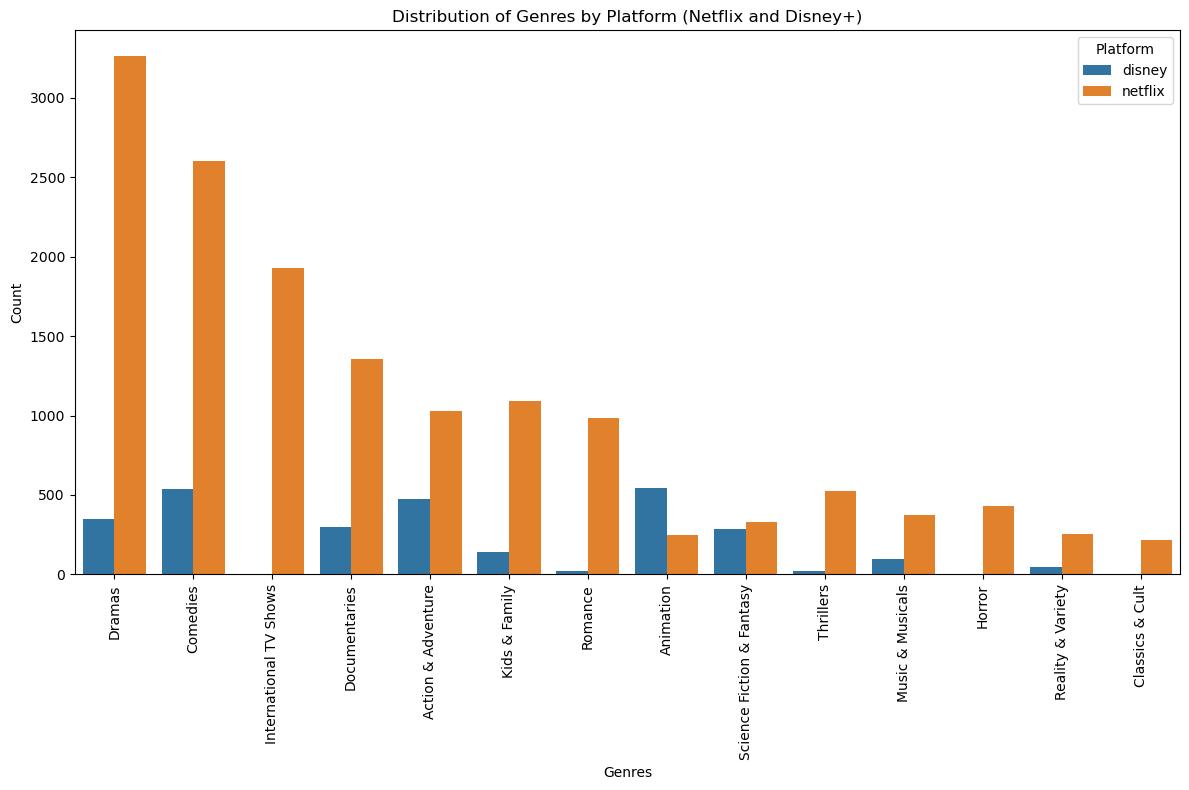

In [43]:
# Crear un gráfico que cuente los géneros en cada plataforma
plt.figure(figsize=(12, 8))
sns.countplot(data=df_exploded, x='genres', hue='plataforma', order=df_exploded['genres'].value_counts().index)
plt.title('Distribution of Genres by Platform (Netflix and Disney+)')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

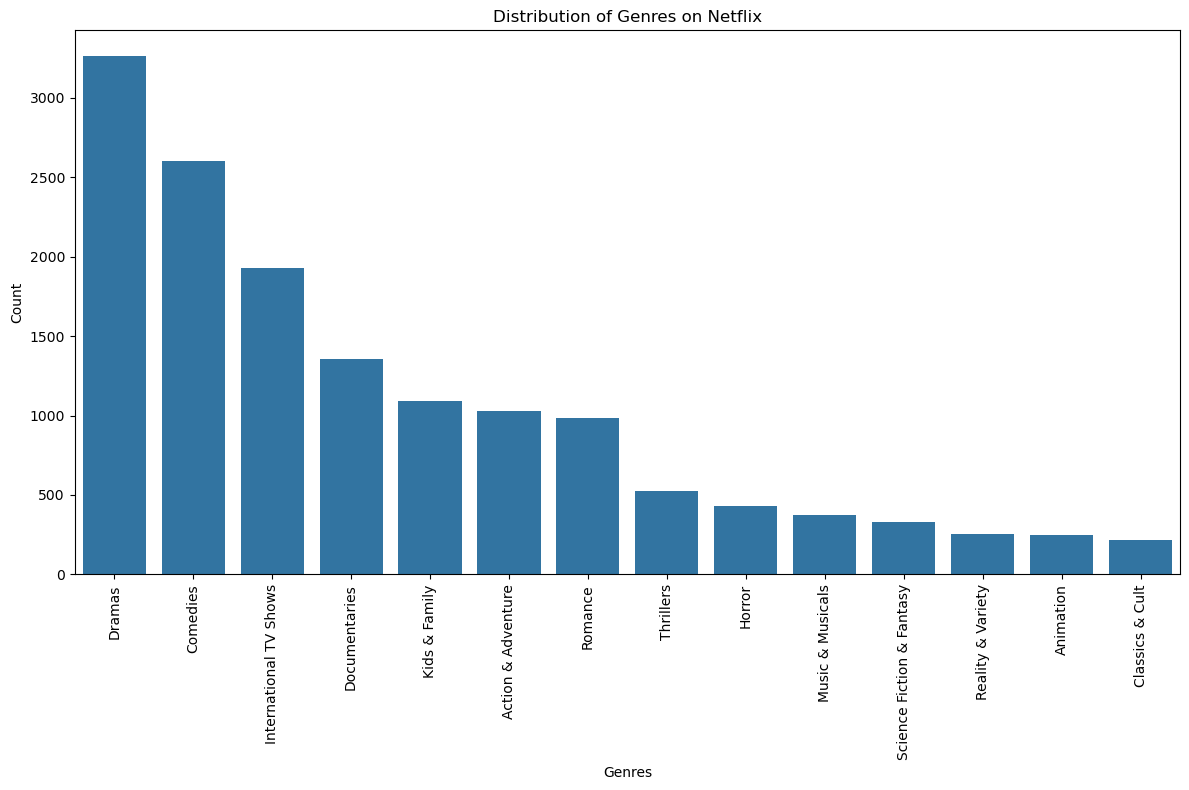

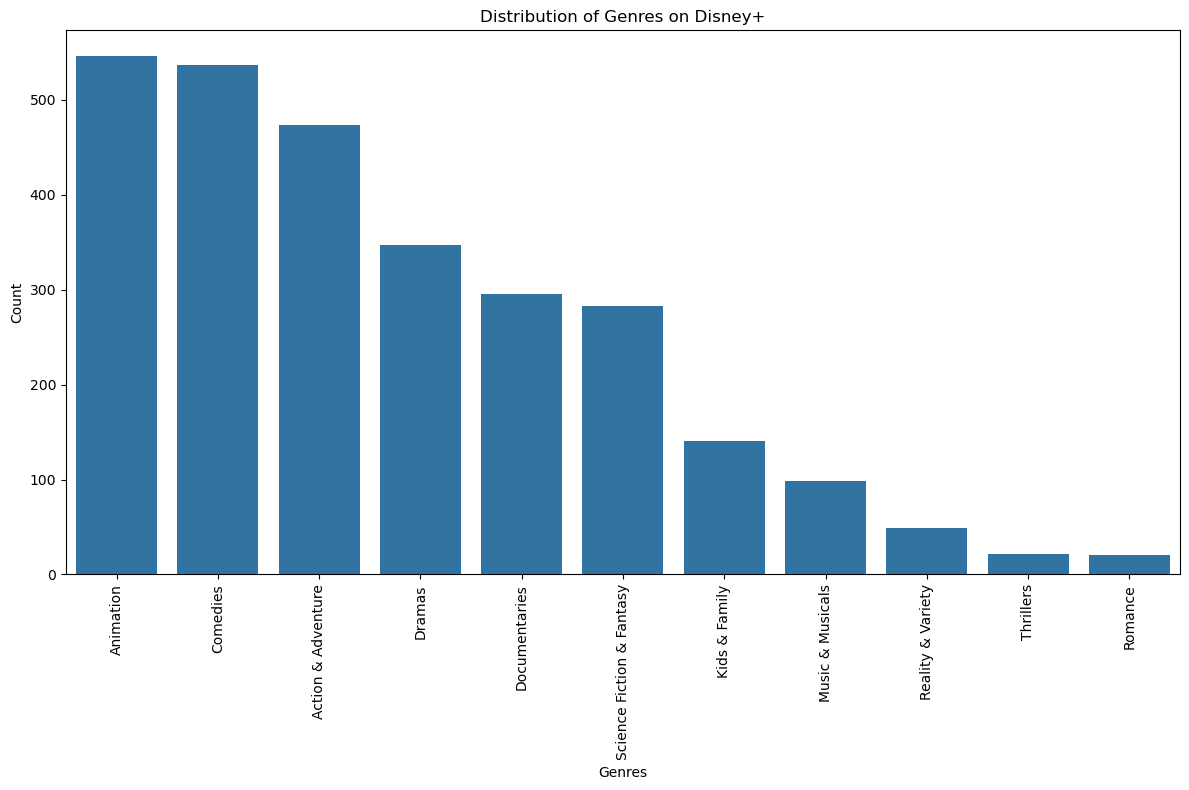

In [44]:
#Creamos gráficos para cada una de las plataformas 

df_netflix = df_exploded[df_exploded['plataforma'] == 'netflix']

df_disney = df_exploded[df_exploded['plataforma'] == 'disney']

# Gráfico para Netflix
plt.figure(figsize=(12, 8))
sns.countplot(data=df_netflix, x='genres', order=df_netflix['genres'].value_counts().index)
plt.title('Distribution of Genres on Netflix')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico para Disney+
plt.figure(figsize=(12, 8))
sns.countplot(data=df_disney, x='genres', order=df_disney['genres'].value_counts().index)
plt.title('Distribution of Genres on Disney+')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()